In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
traffic_info = pd.read_csv("../input/traffic-violations-in-maryland-county/Traffic_Violations.csv", low_memory = False)

In [3]:
traffic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [4]:
bettertraffic = traffic_info.dropna()

In [5]:
bettertraffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1120327 non-null  object 
 1   Time Of Stop             1120327 non-null  object 
 2   Agency                   1120327 non-null  object 
 3   SubAgency                1120327 non-null  object 
 4   Description              1120327 non-null  object 
 5   Location                 1120327 non-null  object 
 6   Latitude                 1120327 non-null  float64
 7   Longitude                1120327 non-null  float64
 8   Accident                 1120327 non-null  object 
 9   Belts                    1120327 non-null  object 
 10  Personal Injury          1120327 non-null  object 
 11  Property Damage          1120327 non-null  object 
 12  Fatal                    1120327 non-null  object 
 13  Commercial License       1120327 non-null 

In [6]:
bettertraffic.Color.describe()

count     1120327
unique         26
top         BLACK
freq       228552
Name: Color, dtype: object

In [7]:
bettertraffic.Model.describe()

count     1120327
unique      16125
top            4S
freq       123370
Name: Model, dtype: object

In [8]:
bettertraffic.Make.describe()

count     1120327
unique       3299
top        TOYOTA
freq       127945
Name: Make, dtype: object

In [9]:
bettertraffic.Model.value_counts()

4S            123370
TK             72245
ACCORD         41579
CIVIC          38953
CAMRY          38063
               ...  
GSL                1
TAHOA              1
FLEET              1
MAZDA 5 SW         1
CIICIC             1
Name: Model, Length: 16125, dtype: int64

In [10]:
bettertraffic.Color.value_counts()

BLACK          228552
SILVER         208094
WHITE          173313
GRAY           125461
RED             88826
BLUE            82911
GREEN           42496
GOLD            36006
BLUE, DARK      23953
TAN             23654
MAROON          19675
BLUE, LIGHT     15218
BEIGE           12837
GREEN, DK       12615
GREEN, LGT       6451
BROWN            5228
YELLOW           4255
ORANGE           3879
BRONZE           2623
PURPLE           2179
MULTICOLOR        832
CREAM             704
COPPER            363
PINK              160
CAMOUFLAGE         22
CHROME             20
Name: Color, dtype: int64

The color of vehicle which is most likely to be involved in a traffic violation is black. Silver, white, and gray are also commonly involved in traffic violations and make up the 2nd, 3rd, and 4th most likely to be involved in a traffic violation, respectively.

The model of vehicle most likely to be involved in a traffic violation is 4S. This likely represents 4 door sedan. The second most likely is TK which likely represents truck. If we were to ignore 4S and TK, the most likely model of a vehicle to be involved in a traffic violation was the Honda Accord.

This information could be found without having to create any graphical representations of the dataet. Below, I experiment with graphical representation of the data.

<AxesSubplot:>

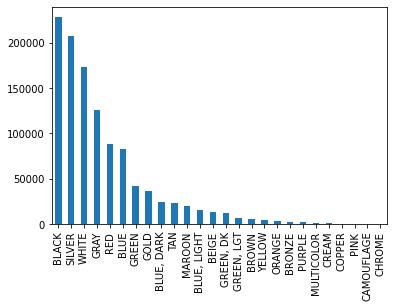

In [11]:
bettertraffic["Color"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Color'>

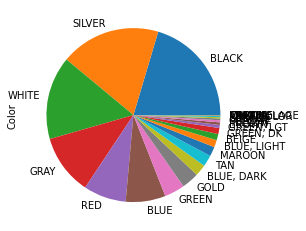

In [12]:
bettertraffic["Color"].value_counts().plot(kind="pie")

There is a figure I made in R which showcases information about car color from the dataset. It can be found inside the folder for Homework 2 in the CS 422 github repository.

<AxesSubplot:>

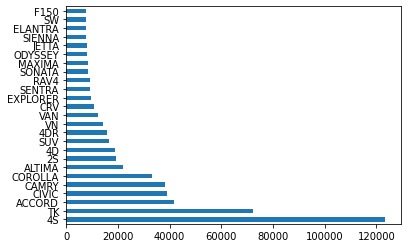

In [13]:
bettertraffic["Model"].value_counts()[:25].plot(kind="barh")

<AxesSubplot:ylabel='Model'>

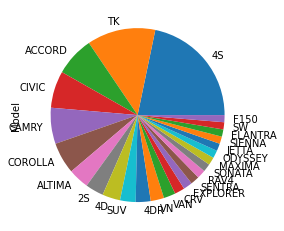

In [14]:
bettertraffic["Model"].value_counts()[:25].plot(kind="pie")

In [15]:
bettertraffic["Arrest Type"].unique()

array(['A - Marked Patrol', 'Q - Marked Laser', 'B - Unmarked Patrol',
       'M - Marked (Off-Duty)', 'E - Marked Stationary Radar',
       'L - Motorcycle', 'R - Unmarked Laser', 'O - Foot Patrol',
       'S - License Plate Recognition', 'D - Unmarked VASCAR',
       'I - Marked Moving Radar (Moving)',
       'H - Unmarked Moving Radar (Stationary)',
       'G - Marked Moving Radar (Stationary)',
       'F - Unmarked Stationary Radar', 'P - Mounted Patrol',
       'C - Marked VASCAR', 'J - Unmarked Moving Radar (Moving)',
       'N - Unmarked (Off-Duty)', 'K - Aircraft Assist'], dtype=object)

In [16]:
bettertraffic["Accident"].unique()

array(['No'], dtype=object)

In [17]:
bettertraffic["Alcohol"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Gender'>

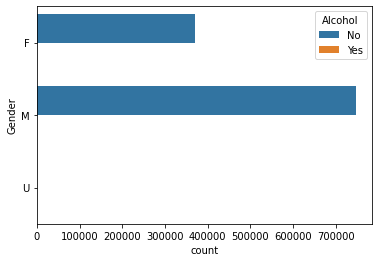

In [18]:
sn.countplot(y="Gender", hue="Alcohol", data = bettertraffic)

I thought this would be interesting to see if the men or women had more violations involving alcohol, but I think the amount of cases which involved alcohol is small to a point which a discernable difference cannot be seen on the graph.

In the below graph I attempt to compare the colors of cars driven by men and women.

<AxesSubplot:xlabel='count', ylabel='Color'>

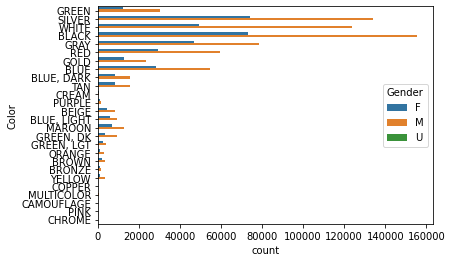

In [19]:
sn.countplot(y="Color", hue="Gender", data = bettertraffic)

In [20]:
bettertraffic["Violation Type"].unique()

array(['Citation', 'Warning', 'SERO'], dtype=object)

<AxesSubplot:>

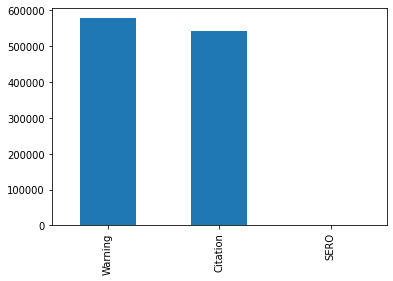

In [21]:
bettertraffic["Violation Type"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Violation Type'>

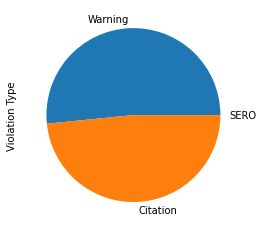

In [22]:
bettertraffic["Violation Type"].value_counts().plot(kind="pie")